A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter. Decision Tree consists of :

* Nodes : Test for the value of a certain attribute.
* Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.
* Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution).


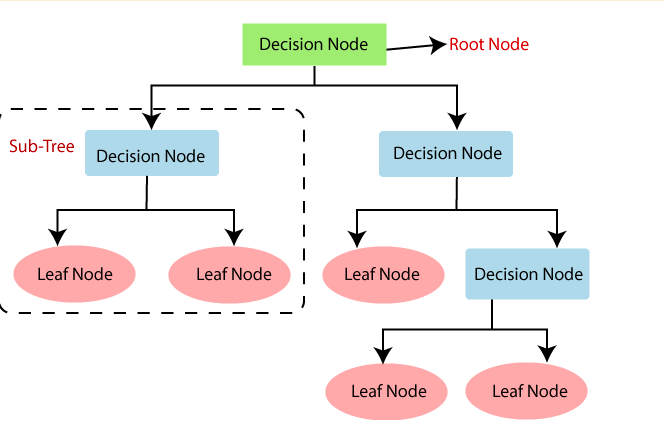

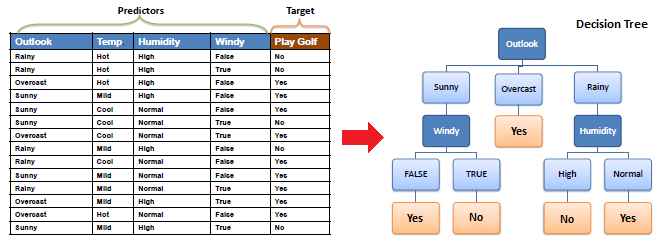

There are two main types of Decision Trees:
* Classification Trees

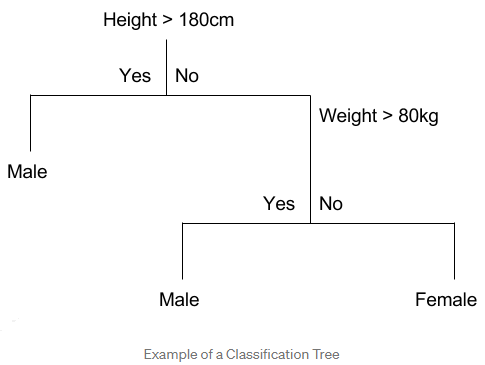




* Regression Trees.


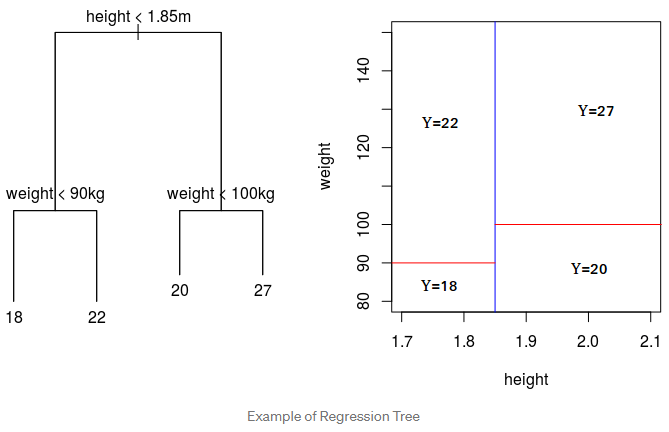

1. Classification trees (Yes/No types) :

What we’ve seen above is an example of classification tree, where the outcome was a variable like ‘fit’ or ‘unfit’. Here the decision variable is Categorical/ discrete. Such a tree is built through a process known as binary recursive partitioning. This is an iterative process of splitting the data into partitions, and then splitting it up further on each of the branches.

2. Regression trees (Continuous data types) :

Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. (e.g. the price of a house, or a patient’s length of stay in a hospital)

#Get Data

In [1]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/mushroom.csv

--2024-04-07 10:18:55--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/mushroom.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379652 (371K) [text/plain]
Saving to: ‘mushroom.csv’

mushroom.csv        100%[===================>] 370.75K  --.-KB/s    in 0.02s   

2024-04-07 10:18:55 (15.0 MB/s) - ‘mushroom.csv’ saved [379652/379652]



# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

# Load Data

In [3]:
dataset=pd.read_csv('mushroom.csv')
dataset.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [ ]:
dataset.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [ ]:
# verify that there are no null columns in the dataset
dataset[dataset.isnull().any(axis=1)]

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
3984,x,y,b,t,n,f,c,b,e,e,...,e,w,p,w,t,e,w,c,w,e
4023,x,y,e,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,p,p
4076,f,y,u,f,n,f,c,n,h,e,...,w,w,p,w,o,f,h,y,d,e
4100,x,y,e,f,y,f,c,n,b,t,...,p,p,p,w,o,e,w,v,d,p
4104,x,y,n,f,f,f,c,n,b,t,...,p,p,p,w,o,e,w,v,l,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [5]:
y = dataset['class']
x = dataset.drop(['class'], axis=1)

In [6]:
print(x.head())

  cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0         x           s         n          t    p               f   
1         x           s         y          t    a               f   
2         b           s         w          t    l               f   
3         x           y         w          t    p               f   
4         x           s         g          f    n               f   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0            c         n          k           e  ...                        s   
1            c         b          k           e  ...                        s   
2            c         b          n           e  ...                        s   
3            c         n          n           e  ...                        s   
4            w         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w  

In [ ]:
print(y.head())

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object


# Data Preprocessing

In [7]:
# use LabelEncoder to replace purchased (dependent variable) with 0 and 1
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
print(y[:10])

[1 0 0 1 0 0 0 0 1 0]


In [8]:
x = pd.get_dummies(x)
print(x.head())

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0        False        False        False        False        False   
1        False        False        False        False        False   
2         True        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0         True          False          False           True          False   
1         True          False          False           True          False   
2        False          False          False           True          False   
3         True          False          False          False           True   
4         True          False          False           True          False   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...          True         False  

# Splitting the dataset into training and test set  

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state


In [27]:
print(x_train.head())

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
5314        False        False        False        False        False   
2075        False        False        False        False        False   
5165        False        False         True        False        False   
1155         True        False        False        False        False   
4448        False        False        False        False        False   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
5314         True          False          False           True          False   
2075         True          False          False           True          False   
5165        False          False          False           True          False   
1155        False          False          False          False           True   
4448         True          False          False          False           True   

      ...  population_s  population_v  population_y  habitat_d  habitat_g 

In [12]:
print(x_test.head())

      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
380         False        False        False        False        False   
3641        False        False         True        False        False   
273         False        False        False        False        False   
1029        False        False        False        False        False   
684         False        False        False        False        False   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
380          True          False          False          False           True   
3641        False          False          False          False           True   
273          True          False          False          False           True   
1029         True          False          False           True          False   
684          True           True          False          False          False   

      ...  population_s  population_v  population_y  habitat_d  habitat_g 

In [ ]:
print(y_train[:10])

[1 0 1 0 1 0 1 0 0 1]


In [ ]:
print(y_test[:10])

[1 0 0 0 0 0 1 1 0 1]


# Build Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
y_pred= classifier.predict(x_test)

# Evaluate Model

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score,recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score

In [16]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1272    0]
 [   0 1166]]


In [17]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [18]:
accuracy_score(y_test,y_pred)

1.0

# Plot the decision tree

[Text(0.5, 0.9285714285714286, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 5686\nvalue = [2936, 2750]'),
 Text(0.23076923076923078, 0.7857142857142857, 'x[21] <= 0.5\nentropy = 0.654\nsamples = 3203\nvalue = [540, 2663]'),
 Text(0.15384615384615385, 0.6428571428571429, 'entropy = 0.0\nsamples = 2279\nvalue = [0, 2279]'),
 Text(0.3076923076923077, 0.6428571428571429, 'x[52] <= 0.5\nentropy = 0.979\nsamples = 924\nvalue = [540, 384]'),
 Text(0.23076923076923078, 0.5, 'x[62] <= 0.5\nentropy = 0.923\nsamples = 580\nvalue = [196, 384]'),
 Text(0.15384615384615385, 0.35714285714285715, 'x[34] <= 0.5\nentropy = 0.587\nsamples = 447\nvalue = [63, 384]'),
 Text(0.07692307692307693, 0.21428571428571427, 'entropy = 0.0\nsamples = 384\nvalue = [0, 384]'),
 Text(0.23076923076923078, 0.21428571428571427, 'entropy = 0.0\nsamples = 63\nvalue = [63, 0]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.0\nsamples = 133\nvalue = [133, 0]'),
 Text(0.38461538461538464, 0.5, 'entropy = 0.0\nsampl

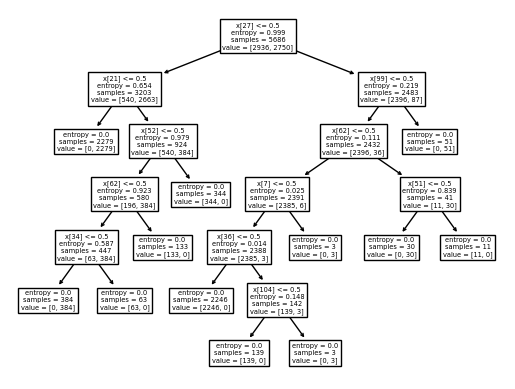

In [19]:
from sklearn.tree import plot_tree
plot_tree(classifier)

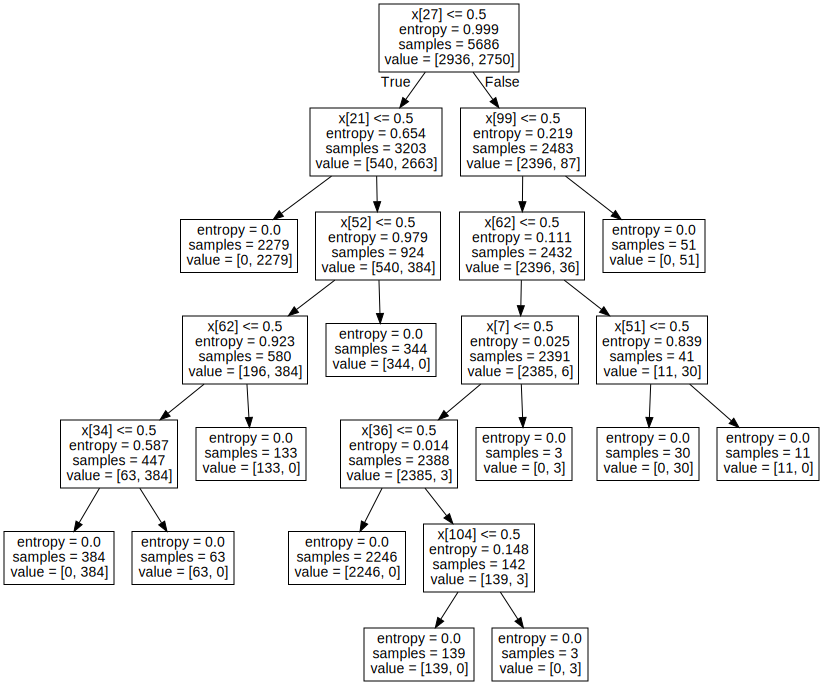

In [20]:
import graphviz # Refer to https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224
from sklearn import tree
dot_data = tree.export_graphviz(classifier)
graph = graphviz.Source(dot_data)
graph